<a href="https://colab.research.google.com/github/citrus1998/nlp100/blob/main/nlp100_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://nlp100.github.io/data/neko.txt

--2022-06-24 22:40:36--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt’

neko.txt            100%[===================>] 952.92K  --.-KB/s    in 0.04s   

2022-06-24 22:40:36 (24.6 MB/s) - ‘neko.txt’ saved [975789/975789]



In [2]:
!apt install mecab libmecab-dev mecab-ipadic-utf8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 8 newly installed, 0 to remove and 49 not upgraded.
Need to get 29.0 MB of archives.
After this operation, 277 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab-dev amd64 0.996-5 [308 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-utils amd64 0.996-5 [4,856 B]
Get:4 http://archive.ubuntu.com/ub

In [3]:
!mecab -o ./neko.txt.mecab ./neko.txt

In [4]:
# Check the number of sentences
!wc -l ./neko.txt.mecab

226266 ./neko.txt.mecab


In [5]:
!pip install mecab-python3 unidic-lite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 574 kB 7.3 MB/s 
     |████████████████████████████████| 47.4 MB 1.3 MB/s 
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658836 sha256=da7e0663011ebb6e898d6f3461f8214948e7b6f99b8b00e3458c84afb01d1289
  Stored in directory: /root/.cache/pip/wheels/de/69/b1/112140b599f2b13f609d485a99e357ba68df194d2079c5b1a2
Successfully built unidic-lite


# 30. 形態素解析結果の読み込み  
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [6]:
import MeCab

In [7]:
filename = './neko.txt.mecab'

sentences = []
morphs = []
with open(filename, 'r', encoding='utf-8') as f:
  for l in f:
    if l not in 'EOS\n':
      spl_l = l.split('\t')
      if spl_l[0] != '':
        spl_cxt = spl_l[1].split(',')
        spl_cxt[-1] = spl_cxt[-1].replace('\n', '')
        morph = {'surface': spl_l[0], 'base': spl_cxt[6], 'pos': spl_cxt[0], 'pos1': spl_cxt[1]}
        morphs.append(morph)
    else:
      sentences.append(morphs)
      morphs = []

sentences = sentences[:2] + [m for m in sentences[2:] if len(m) != 0]
for i, m in enumerate(sentences[2]):
  print(m)

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


#31.
動詞の表層形をすべて抽出せよ．

#32.
動詞の基本形をすべて抽出せよ．

#33.
2つの名詞が「の」で連結されている名詞句を抽出せよ．

#34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [8]:
def list2str(lst):
  return ''.join(lst)

In [9]:
def continue_word_counter(word, idx):
  continue_words = [word[idx]['surface']]
  while word[idx+1]['pos'] != '名詞':
    if word[idx+1]['pos'] != '名詞':
      break
    continue_words.append(word[idx+1]['surface'])
    idx += 1
  #return list2str(continue_words)
  return continue_words

In [10]:
result31 = []
result32 = []
result33 = []
result34 = []

for s in sentences:
  for i, m in enumerate(s):
    if m['pos'] == '動詞':
      result31.append(m['surface'])
      result32.append(m['base'])

  for i in range(1, len(s) - 1):
    if s[i]['surface'] == 'の' and (s[i-1]['pos'] == '名詞' and s[i+1]['pos'] == '名詞'):
      #print(s[i-1]['surface'], s[i+1]['surface'])
      result33.append((s[i-1]['surface'], s[i+1]['surface']))
    
    if s[i]['pos'] == '名詞' and s[i+1]['pos'] == '名詞':
      #print(s[i]['surface'], s[i+1]['surface'])
      #result34.append((s[i]['surface'], s[i+1]['surface']))
      print(continue_word_counter(s, i))


result31 = set(result31)
result32 = set(result32)
result33 = set(result33)
result34 = set(result34)

ストリーミング出力は最後の 5000 行に切り捨てられました。
['一']
['分']
['マイナス']
['一']
['分']
['マイナス']
['三']
['分']
['四']
['二']
['二']
['二']
['廻']
['二']
['十']
['毛']
['一']
['手']
['人間']
['酔']
['暑中']
['休暇']
['張']
['胃弱']
['風呂']
['ざあざあ']
['一']
['今日']
['先生']
['苦']
['沙弥']
['隣']
['ワン']
['驚']
['扇']
['風呂']
['三']
['私']
['なん']
['沙弥']
['迷亭']
['君']
['ん']
['ざ']
['ホホホ']
['土用']
['あと']
['変']
['ちきり']
['希']
['牛肉']
['一']
['希']
['お話']
['希']
['希']
['希']
['——」「']
['あら']
['鍛冶']
['鍛冶']
['迷亭']
['支那']
['苦']
['沙弥']
['一']
['迷亭']
['——']
['誂']
['一つ']
['驚']
['欠伸']
['坐り']
['まま']
['寄木']
['巻煙草']
['一']
['君']
['横']
['ッ']
['突']
['帰']
['天']
['斎']
['君']
['事']
['心配']
['壊']
['まま']
['沙弥']
['価']
['迷亭']
['ケース']
['十']
['四']
['パナマ']
['好奇']
['厄']
['十']
['四']
['迷亭']
['三']
['日']
['ぷつりと']
['度']
['物']
['螺旋']
['釘']
['ん']
['ざあ']
['損']
['眼']
['覚']
['眼']
['眼']
['時']
['客']
['二']
['奥さん']
['なあに']
['辛']
['心配']
['むざと']
['二']
['奥さん']
['一']
['十']
['二']
['三']
['簀']
['さ']
['三']
['分']
['八']
['一']
['五']
['ゅうと']
['咽']
['一']
['二']
['度']
['迷亭']
['一']
['二']
['滴']
['眼']
['二']
['三']
['奥さん

In [11]:
print(result31)

{'使っ', '伝える', 'そそのかさ', 'つつま', '代っ', '亡ぼさ', '答え', 'ひろげる', 'わかる', 'くだら', '読む', '巻き込ま', '超し', 'やってのけ', '忌み嫌っ', 'こん', 'ふくれ', '説い', 'はずす', 'つけ', '利かし', '曲がり', 'すべれ', '載っ', '伝わっ', '持つ', '湧い', '懲り', '従っ', '調子づく', '抜け', '救い出し', '述べよ', '栄え', 'くぐっ', '思っ', '愛し', 'され', 'たた', 'だし', '困っ', 'きき', '障り', 'うなら', '捻る', '持ち切っ', '出逢っ', '進も', '残し', '似合う', '供える', '上っ', '尖', '向け', '演じ', '緩め', '作っ', '向っ', '溺れ', '見せよ', 'かしこまり', '知ろ', 'いがみ合い', '思い出し', '講じ', '添え', '送ら', '落とし', '舞い込む', '問い返さ', '見出す', '終', '吸い取ら', '綯っ', '焦がれ', '突っ伏し', '乗り出し', 'かから', '掻き', '思え', '見廻し', '極める', '疑わ', '洩る', '突い', 'ふれ', '害し', '称せ', 'しつけ', '惹い', '飛び込も', '畳み込ん', '訳し', '困りゃ', '透し', '這い出そ', '祝う', '打ち明ける', '臨む', '結い', 'る', '気づかい', 'しまお', '廻り', 'おどかす', '参ら', '応ずる', '冷え', '確かめ', '裂き', 'たまる', '棄てる', '授け', '拾い', 'せまら', '表わし', '極め付け', '剥がれ', 'ち', '感ぜ', '捻っ', '重ね', '掻きむしる', '産まれ', '食いつく', '描く', '出会わ', '転がし', '待て', '磨り潰し', '好ん', '引込ん', '掘り出す', '働く', '被っ', '洩れ', '誂え', 'ゆす', '曲がろ', 'なで', '抛り出す', '堪り', '減る', '取りはずす', '話そ', '切り抜か', '叫ん', '下す', '喚び', '妨げ

In [12]:
print(result32)

{'伝える', '司る', '突き付ける', 'ひろげる', 'わかる', '泣かせる', '読む', '論ずる', '蘇る', 'はずす', '病む', '借る', '取りつく', 'せり出す', '持つ', 'こまる', '調子づく', '連れ出す', '割り出す', '煎じる', '捻る', 'むき出す', '供える', '似合う', '探る', '見馴れる', '備わる', '急ぐ', 'はちきれる', '縺れる', '見出す', '舞い込む', '飛ばす', '載っける', 'ふるえる', '思い返す', '見上ぐ', '投げる', '極める', '洩る', 'いらう', '待ち合せる', '罷る', '仕入れる', 'あてこする', 'じみる', '祝う', '打ち明ける', '臨む', 'る', 'おどかす', '応ずる', '冒す', '棄てる', 'たまる', 'ほかなる', '晴れ渡る', 'あきれ返る', 'ききつける', '掻きむしる', '食いつく', '聞き出す', '描く', '脱す', '掘り出す', '合す', '働く', 'もとめる', '見つける', '出来上がる', '引き続く', '凹む', '抛り出す', '減る', 'せまる', '取りはずす', '逆上せる', '下す', '見張る', 'からむ', 'じれる', '遣る', '曲る', 'こす', '出直す', '飛込む', '更ける', '阿る', '心づく', '知らせる', '飾る', 'さがす', 'ぶらさげる', 'ゆるめる', '当てる', 'あびる', '連れる', '張付ける', '奏する', '使いこなせる', '取り上げる', '慰む', '取り寄せる', 'うなる', '受取る', '泣かす', '見当る', '燃える', '漲る', '流行る', '腐れる', 'とちる', '止す', '申し立てる', '目ざす', '怒鳴る', '切り抜ける', '思い立つ', '選ぶ', 'ねばる', '陣取る', '面す', '代る', '伏す', '据え付ける', '蒙る', '着ける', '生やす', '応じる', '問い掛ける', '片づく', '乗り越す', '映じる', 'とりとめる', '照り付ける', '降る', '振い落す', '加える'

In [13]:
print(result33)

{('例', '書斎'), ('以前', '関係'), ('署', '管轄'), ('歴々', '学者'), ('画', '未練'), ('一種', '見地'), ('鼻', '中'), ('綿ネル', '洗いざらし'), ('陌上', '塵'), ('君', '名'), ('本人', '弁解'), ('純粋', '遊戯'), ('檜', '方'), ('つづら', '蓋'), ('古代', '神'), ('竣功', '期'), ('昔', '希'), ('眼前', '現象'), ('大兄', '為'), ('黒', '比較'), ('湯', '方'), ('禅師', '電光'), ('ところ', 'よう'), ('顔', '権衡'), ('鼻', '事'), ('品性', '比較'), ('書斎', '掃除'), ('今', '名'), ('文明', '弊'), ('額', '上'), ('先刻', 'よう'), ('今日', '車夫'), ('自己', '影'), ('別', '縄'), ('居士', '墓碑銘'), ('仙', '勢力'), ('ヴァイオリン', '箱'), ('靴', '音'), ('母堂', 'それ'), ('元', '通り'), ('主人', '逆上'), ('さ', '球'), ('土俵', '真中'), ('弥生', '空'), ('君', '創作'), ('心', '裡'), ('幼稚園', '生徒'), ('馬鹿', '癖'), ('竈', '蓋'), ('泥棒', '方'), ('棒', 'よう'), ('大和魂', '演説'), ('大抵', '釘'), ('国民', '歓喜'), ('小倉', '袴'), ('彼等', '仲間'), ('一両日', '後'), ('慶賀', '意'), ('鷲', '了見'), ('細君', '枕元'), ('近松', '心中'), ('猫', '春'), ('旦那', '事'), ('諸君', '義務'), ('自分', '麺'), ('令嬢', '鼻'), ('左', '隅'), ('巴里', '大学'), ('個中', '味'), ('付', '箱'), ('例', '蠅'), ('不明', '実質'), ('研究', 'ため'), ('家', '芽生'), ('売薬', 'よう'),

In [14]:
print(result34)
print(len(result34))

set()
0


# 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [15]:
from collections import defaultdict

dic = defaultdict(int)
for s in sentences:
  for i, m in enumerate(s):
    if m['pos'] != '記号':
      dic[m['base']] += 1

dic = sorted(dic.items(), key=lambda k: k[1], reverse=True)

for k, v in dic:
  print(k, ':', v)

ストリーミング出力は最後の 5000 行に切り捨てられました。
若し : 2
江 : 2
喫する : 2
父母 : 2
畏い : 2
栄達 : 2
平家 : 2
再拝 : 2
不透明 : 2
寸断 : 2
打ち返す : 2
あくまで : 2
命題 : 2
小町 : 2
日間 : 2
役目 : 2
憚り : 2
御難 : 2
口上 : 2
痛み入る : 2
伴 : 2
将軍家 : 2
総会 : 2
すこしも : 2
引きつける : 2
戴く : 2
正成 : 2
理科 : 2
大騒ぎ : 2
読み : 2
よみ : 2
蝦 : 2
打ち殺す : 2
胆力 : 2
東洋 : 2
寄宿舎 : 2
泊りがけ : 2
膏薬 : 2
禅宗 : 2
逆さま : 2
陶然 : 2
禅学 : 2
踏切る : 2
溺れる : 2
助ける : 2
天上 : 2
仙人 : 2
僕ら : 2
権化 : 2
任じる : 2
世人 : 2
救う : 2
取り寄せる : 2
奇妙 : 2
上がれる : 2
きびしい : 2
そり : 2
来訪 : 2
通例 : 2
役人 : 2
物件 : 2
日本堤 : 2
恭謙 : 2
お辞儀 : 2
相場 : 2
波瀾 : 2
見習う : 2
唱道 : 2
病院 : 2
卜 : 2
持参 : 2
陽性 : 2
非凡 : 2
心丈夫 : 2
やさしい : 2
あす : 2
暴露 : 2
無意義 : 2
ごみ : 2
ほこり : 2
故事 : 2
挙る : 2
いっこう : 2
泣き声 : 2
具える : 2
出し : 2
ぬすむ : 2
シンフォニー : 2
美妙 : 2
炭 : 2
繁昌 : 2
正式 : 2
引きずり出す : 2
長女 : 2
教わる : 2
次女 : 2
白粉 : 2
はげしい : 2
授ける : 2
突進 : 2
拭う : 2
持ち : 2
あてがう : 2
たたく : 2
だだっ子 : 2
伊藤 : 2
博文 : 2
よむ : 2
させる : 2
良民 : 2
宙返り : 2
あくび : 2
洗い : 2
欅 : 2
笠 : 2
処理 : 2
刀 : 2
朱 : 2
おえる : 2
食事 : 2
暴威 : 2
暴君 : 2
したがって : 2
無難 : 2
取払う : 2
丹念 : 2
かじる : 2
まして : 2
絶 : 2
式部 

#36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [16]:
!pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 6.9 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=c2e26a7f03644932b742d63ae775a9926ae0952e2127ecfefbbf516bd0985b40
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


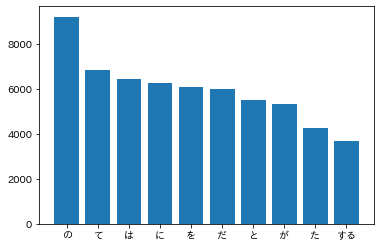

In [17]:
import matplotlib.pyplot as plt
import japanize_matplotlib

x, y = zip(*dic[:10])
plt.bar(x, y)
plt.show()

#37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

の : 391
は : 272
に : 250
を : 232
だ : 231
て : 229
と : 202
が : 180
する : 144
た : 140


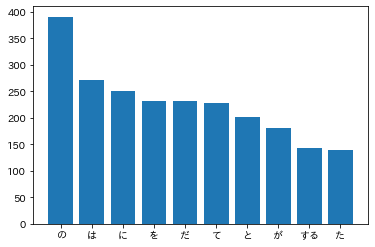

In [18]:
from collections import defaultdict

dic = defaultdict(int)
for s in sentences:
  if len([m for m in s if m['surface'] == '猫']) != 0:
   for i, m in enumerate(s):
     if m['pos'] != '記号':
       dic[m['base']] += 1

del dic['猫']
dic = sorted(dic.items(), key=lambda k: k[1], reverse=True)

for k, v in dic[:10]:
  print(k, ':', v)

x, y = zip(*dic[:10])
plt.bar(x, y)
plt.show()

#38. ヒストグラム
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

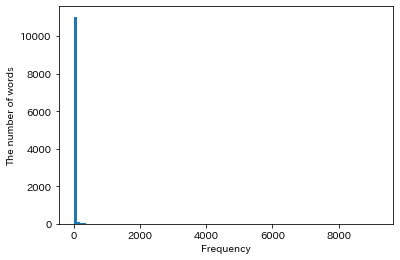

In [20]:
from collections import defaultdict

dic = defaultdict(int)
for s in sentences:
  for i, m in enumerate(s):
    if m['pos'] != '記号':
      dic[m['base']] += 1

plt.hist(dic.values(), bins=100)
plt.xlabel('Frequency')
plt.ylabel('The number of words')
plt.show()

#39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ.

In [32]:
def ranking(lst):
  #idx_lst = sorted([i for i in range(len(lst))])
  idx_lst = sorted(range(len(lst)), key=lst.__getitem__)
  sorted_lst = [lst[rank] for rank in idx_lst]
  count = 0
  out_lst = [0] * len(lst)
  for i in range(len(lst)):
    count += 1
    if i == len(lst)-1 or sorted_lst[i] != sorted_lst[i+1]:
      for j in range(i-count+1, i+1):
        out_lst[idx_lst[j]] = len(lst) - (i-count+2) + 1
      count = 0
  
  return out_lst

In [34]:
from collections import defaultdict

dic = defaultdict(int)
for s in sentences:
  for i, m in enumerate(s):
    if m['pos'] != '記号':
      dic[m['base']] += 1

dic = sorted(dic.items(), key=lambda k: k[1], reverse=True)

In [35]:
dic_values = [v for (k, v) in dic]
dic_values

[9194,
 6848,
 6420,
 6243,
 6071,
 5972,
 5508,
 5337,
 4267,
 3657,
 3052,
 2479,
 2320,
 2191,
 2084,
 2031,
 1777,
 1568,
 1529,
 1408,
 1207,
 1164,
 1146,
 1120,
 1034,
 987,
 981,
 973,
 932,
 719,
 696,
 675,
 657,
 649,
 636,
 617,
 602,
 576,
 554,
 546,
 539,
 502,
 502,
 481,
 460,
 450,
 450,
 414,
 410,
 381,
 347,
 346,
 345,
 340,
 324,
 319,
 317,
 317,
 313,
 313,
 312,
 311,
 303,
 294,
 294,
 286,
 282,
 274,
 272,
 269,
 268,
 261,
 260,
 250,
 248,
 246,
 241,
 238,
 236,
 234,
 231,
 231,
 227,
 220,
 217,
 216,
 213,
 207,
 206,
 205,
 199,
 195,
 195,
 194,
 194,
 193,
 189,
 185,
 179,
 176,
 175,
 175,
 173,
 172,
 169,
 169,
 168,
 166,
 166,
 159,
 158,
 154,
 154,
 152,
 152,
 151,
 150,
 150,
 149,
 149,
 149,
 148,
 147,
 143,
 143,
 142,
 140,
 134,
 134,
 133,
 132,
 131,
 131,
 129,
 127,
 126,
 125,
 125,
 125,
 121,
 120,
 119,
 119,
 119,
 118,
 118,
 116,
 116,
 115,
 115,
 114,
 113,
 113,
 112,
 111,
 111,
 110,
 108,
 108,
 108,
 108,
 107,
 10

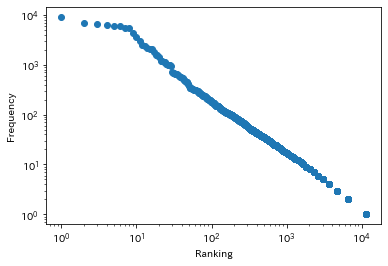

In [40]:
plt.scatter(ranking(dic_values), dic_values)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Ranking')
plt.ylabel('Frequency')
plt.show()